In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

# load data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample = pd.read_csv("sample.csv",header=None)

# data shapes
print("train:",train.shape,"test:",test.shape,"sample:",sample.shape)

train: (207, 12) test: (40, 11) sample: (41, 2)


In [2]:
# y = 販売数（目的変数）
train.index = pd.to_datetime(train["datetime"])
train.head()

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature
datetime,,,,,,,,,,,,
2013-11-18,2013-11-18,90,月,0,厚切りイカフライ,NaN,NaN,NaN,NaN,快晴,--,19.8
2013-11-19,2013-11-19,101,火,1,手作りヒレカツ,NaN,NaN,NaN,NaN,快晴,--,17.0
2013-11-20,2013-11-20,118,水,0,白身魚唐揚げ野菜あん,NaN,NaN,NaN,NaN,快晴,--,15.5
2013-11-21,2013-11-21,120,木,1,若鶏ピリ辛焼,NaN,NaN,NaN,NaN,快晴,--,15.2
2013-11-22,2013-11-22,130,金,1,ビッグメンチカツ,NaN,NaN,NaN,NaN,快晴,--,16.1


In [3]:
train.describe()# 販売数の基本統計量

,y,soldout,kcal,payday,temperature
count,207.000000,207.000000,166.000000,10.0,207.000000
mean,86.623188,0.449275,404.409639,1.0,19.252174
std,32.882448,0.498626,29.884641,0.0,8.611365
min,29.000000,0.000000,315.000000,1.0,1.200000
25%,57.000000,0.000000,386.000000,1.0,11.550000
50%,78.000000,0.000000,408.500000,1.0,19.800000
75%,113.000000,1.000000,426.000000,1.0,26.100000
max,171.000000,1.000000,462.000000,1.0,34.600000


In [4]:
train.describe(include="O") # 文字列型の基本統計量

,datetime,week,name,remarks,event,weather,precipitation
count,207,207,207,21,14,207,207
unique,207,5,156,6,2,7,8
top,2013-11-18,水,メンチカツ,お楽しみメニュー,ママの会,快晴,--
freq,1,43,6,12,9,53,169


In [5]:
# 欠損値補完(payday：null修正、precipitation:--を-1に変換、event,remarks:nullを補完、month:月を抽出)
train["payday"] = train["payday"].fillna(0)
train["precipitation"] = train["precipitation"].apply(lambda x : -1 if x == "--" else float(x))
train["event"] = train["event"].fillna("なし")
train["remarks"] = train["remarks"].fillna("なし")
train["month"] = train["datetime"].apply(lambda x :int(x.split("-")[1]))

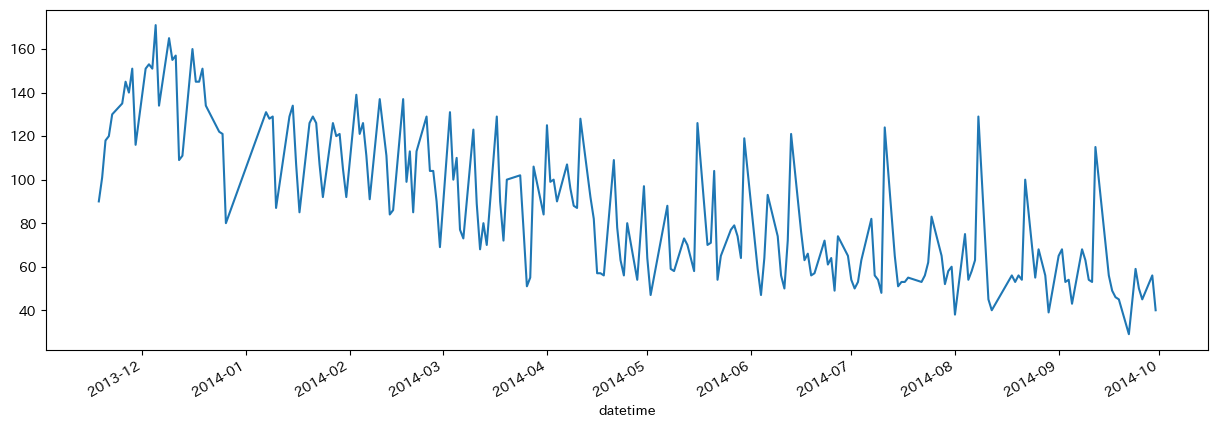

In [6]:
# y = 販売数（目的変数）の日付ごとの確認
# 日数が経過するについて売り上げは減少する
# 周期的な数値のスパイクがあるため、売り上げに寄与している他の要因がある可能性
train["y"].plot(figsize=(15,5))
plt.show()

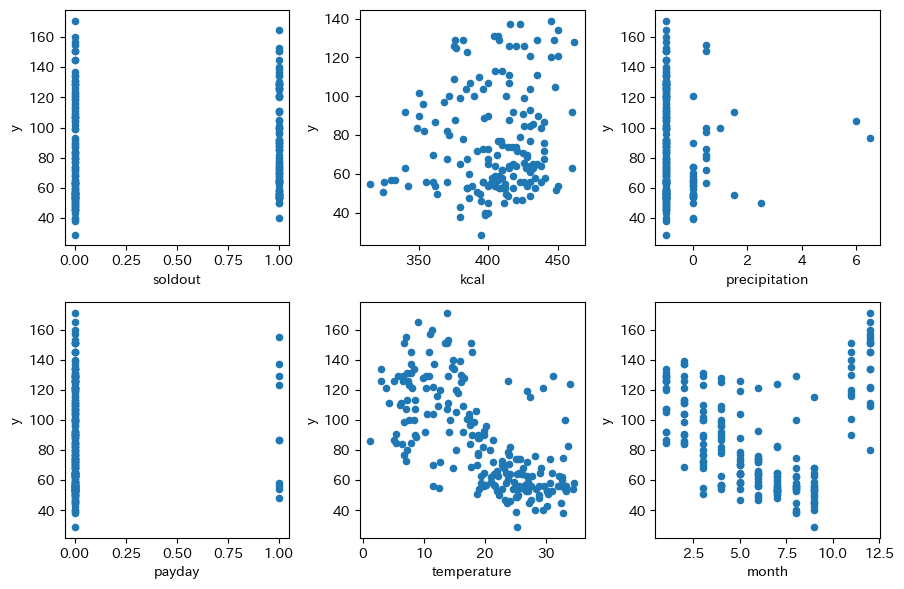

In [7]:
# 目的変数ｙと各説明変数の関係性の確認

fig, ax = plt.subplots(2,3,figsize=(9,6))
train.plot.scatter(x="soldout", y="y", ax=ax[0][0])
train.plot.scatter(x="kcal", y="y", ax=ax[0][1])
train.plot.scatter(x="precipitation", y="y", ax=ax[0][2])
train.plot.scatter(x="payday", y="y", ax=ax[1][0])
train.plot.scatter(x="temperature", y="y", ax=ax[1][1])
train.plot.scatter(x="month", y="y", ax=ax[1][2])
plt.tight_layout()
plt.show()

C:\Users\NDY10\AppData\Local\Temp\ipykernel_19376\2018322632.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1][0].set_xticklabels(ax[1][0].get_xticklabels(),rotation=30)


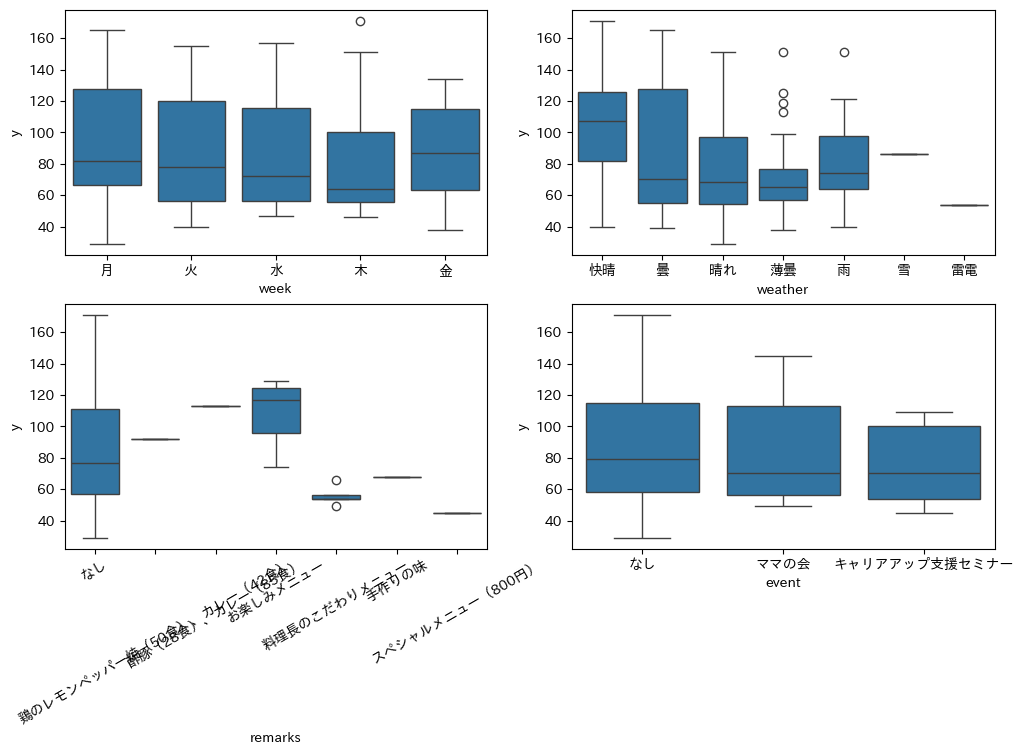

In [8]:
# remarksの「お楽しみメニュー」が売り上げ数ｙに寄与している可能性が大きい
fig, ax = plt.subplots(2,2,figsize=(12,7))
sns.boxplot(x="week",y="y",data=train,ax=ax[0][0])
sns.boxplot(x="weather",y="y",data=train,ax=ax[0][1])
sns.boxplot(x="remarks",y="y",data=train,ax=ax[1][0])
ax[1][0].set_xticklabels(ax[1][0].get_xticklabels(),rotation=30)
sns.boxplot(x="event",y="y",data=train,ax=ax[1][1])
plt.show()

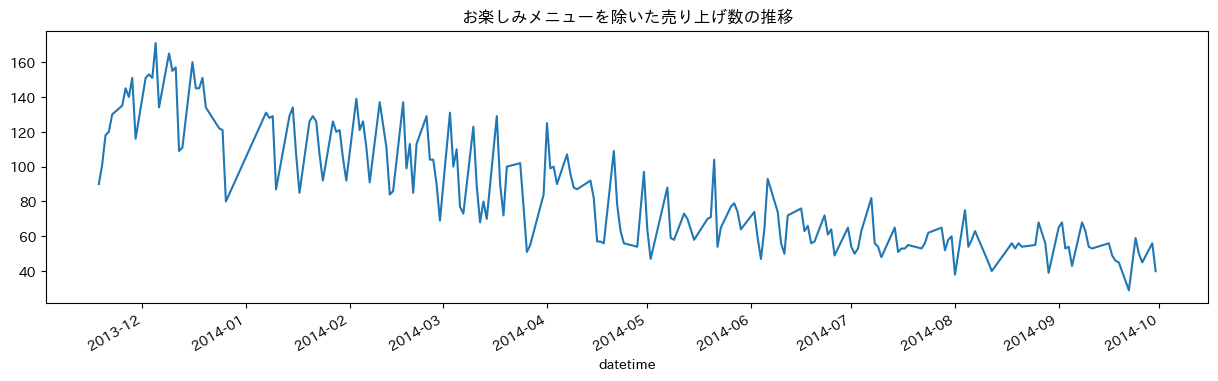

In [9]:
# 特に後半の売り上げスパイクが減少している
train[train["remarks"]!="お楽しみメニュー"]["y"].plot(figsize=(15,4))
plt.title("お楽しみメニューを除いた売り上げ数の推移")
plt.show()

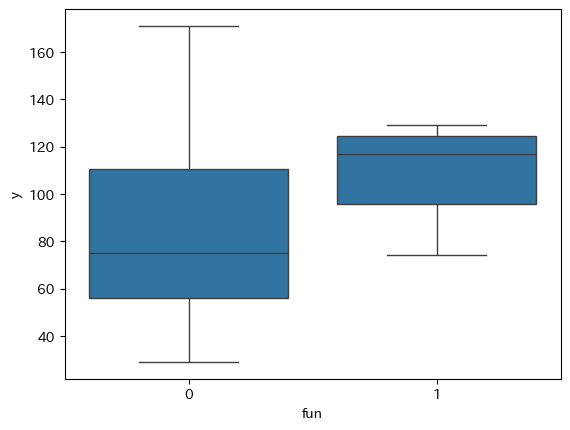

In [10]:
# 箱ひげ図においても「お楽しみメニュー」のあるなしで売り上げに差があり
train["fun"] = train["remarks"].apply(lambda x: 1 if x=="お楽しみメニュー" else 0)
sns.boxplot(x="fun",y="y",data=train)
plt.show()

In [11]:
# メディアン検定（中央値検定）
# p値が0.05以下であるため、帰無仮説を棄却し、「お楽しみメニュー」の有無で売り上げの中央値に差があると判断できる
from scipy.stats import median_test
stat,p,med,tbl = median_test(train[train["fun"]==1]["y"],train[train["fun"]==0]["y"])
print("カイ二乗検定の統計量：",stat,"p値：",p,"中央値：",med)


カイ二乗検定の統計量： 7.2581589841730345 p値： 0.007057960766247775 中央値： 78.0


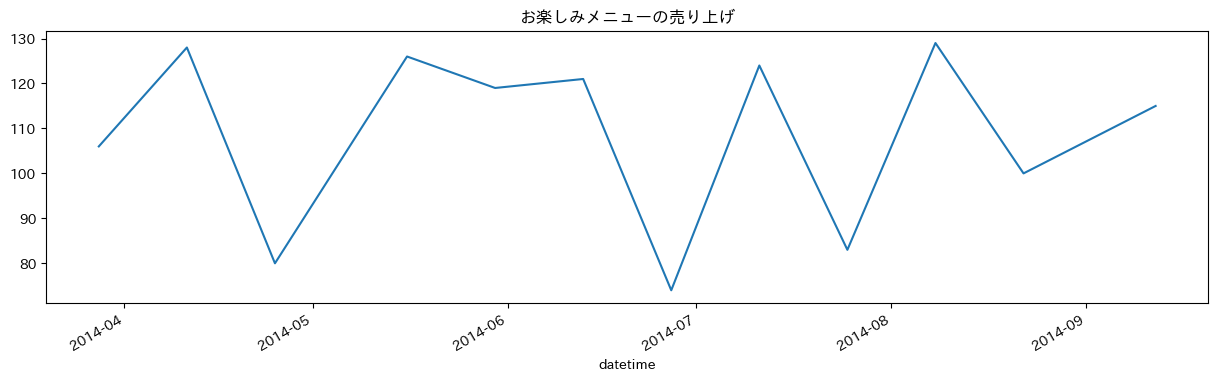

In [12]:

# お楽しみメニューの売り上げの中にも凹凸がある
train[train["remarks"]=="お楽しみメニュー"]["y"].plot(figsize=(15,4))
plt.title("お楽しみメニューの売り上げ")
plt.show()

In [13]:
train[train["remarks"]=="お楽しみメニュー"]

,datetime,y,week,soldout,name,kcal,remarks,event,payday,weather,precipitation,temperature,month,fun
datetime,,,,,,,,,,,,,,
2014-03-28,2014-3-28,106,金,0,キーマカレー,NaN,お楽しみメニュー,なし,0.0,快晴,-1.0,18.5,3,1
2014-04-11,2014-4-11,128,金,1,チキンカレー,NaN,お楽しみメニュー,なし,0.0,快晴,-1.0,16.5,4,1
2014-04-25,2014-4-25,80,金,0,中華丼,NaN,お楽しみメニュー,なし,0.0,晴れ,-1.0,20.8,4,1
2014-05-16,2014-5-16,126,金,0,ポークカレー,NaN,お楽しみメニュー,ママの会,0.0,快晴,-1.0,23.8,5,1
2014-05-30,2014-5-30,119,金,0,チキンカレー,NaN,お楽しみメニュー,なし,0.0,薄曇,-1.0,26.9,5,1
2014-06-13,2014-6-13,121,金,0,キーマカレー,NaN,お楽しみメニュー,なし,0.0,晴れ,-1.0,29.5,6,1
2014-06-27,2014-6-27,74,金,0,牛丼,NaN,お楽しみメニュー,なし,0.0,雨,0.0,25.4,6,1
2014-07-11,2014-7-11,124,金,0,ポークカレー,NaN,お楽しみメニュー,なし,0.0,晴れ,-1.0,33.9,7,1
2014-07-25,2014-7-25,83,金,0,ひやしたぬきうどん・炊き込みご飯,NaN,お楽しみメニュー,なし,0.0,晴れ,-1.0,33.6,7,1


<Axes: xlabel='curry', ylabel='y'>

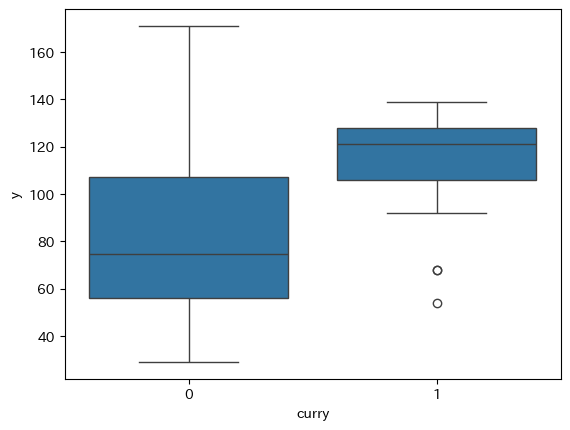

In [14]:
train["curry"] = train["name"].apply(lambda x : 1 if x.find("カレー")>=0 else 0)
sns.boxplot(x="curry",y="y",data=train)

<Axes: xlabel='subuta', ylabel='y'>

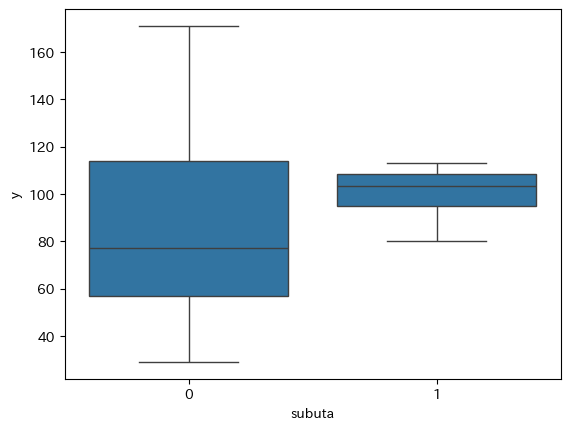

In [15]:
train["subuta"] = train["name"].apply(lambda x : 1 if x.find("酢豚")>=0 else 0)
sns.boxplot(x="subuta",y="y",data=train)

<Axes: xlabel='sp', ylabel='y'>

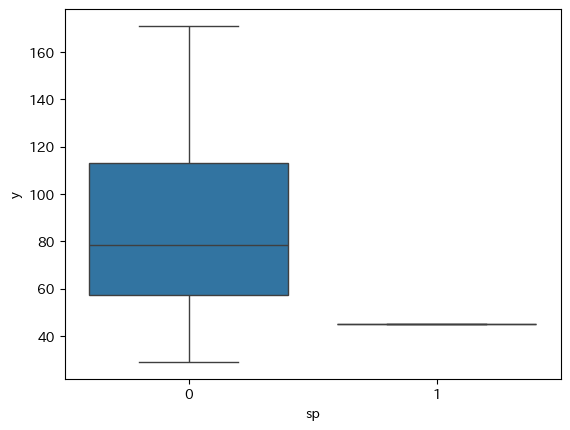

In [16]:
train["sp"] = train["remarks"].apply(lambda x : 1 if x.find("スペシャルメニュー")>=0 else 0)
sns.boxplot(x="sp",y="y",data=train)

<Axes: xlabel='kd', ylabel='y'>

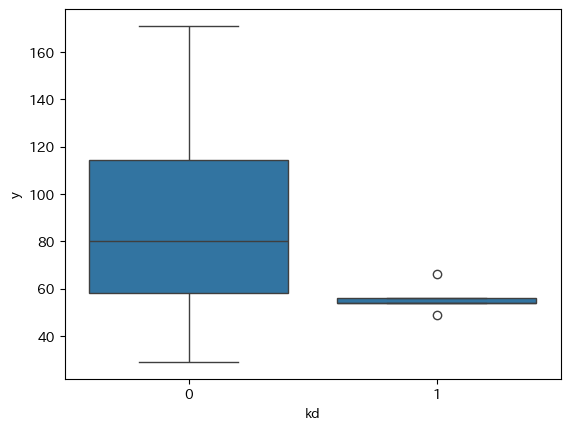

In [17]:
train["kd"] = train["remarks"].apply(lambda x : 1 if x.find("料理長")>=0 else 0)
sns.boxplot(x="kd",y="y",data=train)